In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: Predicting College Admissions

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [3]:
# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data exploration using train and basic models [16 pts]**](#part1)

- [**Question 2: Interpretable modeling [18 pts]**](#part2)

- [**Question 3: Harvard and Yale? [30 pts]**](#part3)

- [**Question 4: Building predictive models for admitted [24 pts]**](#part4)

- [**Question 5: Evaluating results [12 pts]**](#part5)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `"admitted"` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test_score**: a standardized measurement of the applicant's highest ACT or SAT combined score (2400 is the maximum)
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of the applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = United States
- **sports**: a binary indicator for High School All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

**The main set of 12 predictors is:**

```python
[
    "test_score", "ap", "avg_ap", "sat_subjects", 
    "gpa", "female", "minority", "international",
    "sports", "school", "early_app", "alumni",
]
```

Please note, you may need to modify this list when fitting different models, and you will be replacing the `"school"` variable with a binary `"harvard"` variable early in the questions below.


**IMPORTANT NOTES:**

- Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).


- When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).


- Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.

---

<a id="part1"></a>

## <div class='exercise'>Question 1: Data exploration using train and basic models [16 pts]</div>

[Return to contents](#contents)

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While an argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **[Question 4.1](#part4)**.


In [1]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv("data/college_admissions.csv")
np.random.seed(121)

college_train, college_test = train_test_split(
    college,
    test_size=0.2,
    random_state=121,
    shuffle=True,
    stratify=college["school"],
)

print(college.shape)
print(college_train.shape, college_test.shape)
display(college_train.head())
college_train.info()

NameError: name 'pd' is not defined

<div class='exercise-r'>

**Q1.1** Calculate the proportion of observations in the train data that were admitted and store this value in `prop_admitted_train`.  What would be the train and test classification accuracies for a baseline "naive" model where we classified *ALL* applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)? Store these classification accuracies in `naive_train_acc` and `naive_test_acc`.
    
**NOTE:** For this assignment, use the convention that accuracies range from 0 to 1 (to be consistant with sklearn).
    
</div>

_Points:_ 2.5

In [5]:
# your code here
prop_admitted_train = np.mean(college_train['admitted'])

naive_train_acc = prop_admitted_train**2+(1-prop_admitted_train)**2
p_true=np.mean(college_test['admitted'])
               
naive_test_acc = p_true*prop_admitted_train +(1-p_true)*(1-prop_admitted_train)

In [6]:
print(f"Proportion Admitted in training Data: {prop_admitted_train:.2f}")
print("Naive Classification Model Based on Training Proportions")
print(f"\tTrain Accuracy: {naive_train_acc:.2f}")
print(f"\tTest Accuracy: {naive_test_acc:.2f}")

Proportion Admitted in training Data: 0.26
Naive Classification Model Based on Training Proportions
	Train Accuracy: 0.61
	Test Accuracy: 0.60


In [7]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.2** Create a binary ("dummy") variable named `"harvard"` in both the train and test DataFrames that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore how each of our 12 predictors is associated with whether or not an applicant is admitted into the college to which they applied (`admitted`). Create a separate **visual** for each of our predictors to investigate their relationship with college admissions. **Suggestion:** Place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**NOTE:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
    
</div>

_Points:_ 0

In [8]:
# Create dummy variable
# your code here
college_test['harvard']=(college_test['school']=='Harvard').astype(int)
college_train['harvard']=(college_train['school']=='Harvard').astype(int)

In [9]:
# college_train

In [10]:
# college_train.columns.to_list()
cols=['test_score',
     'ap',
     'avg_ap',
     'sat_subjects',
     'gpa',
     'female',
     'minority',
     'international',
     'sports',
     'early_app',
     'alumni',
     'harvard']

In [11]:
X_train=college_train[cols]
y_train = college_train['admitted']
X_test=college_test[cols]
y_test = college_test['admitted']


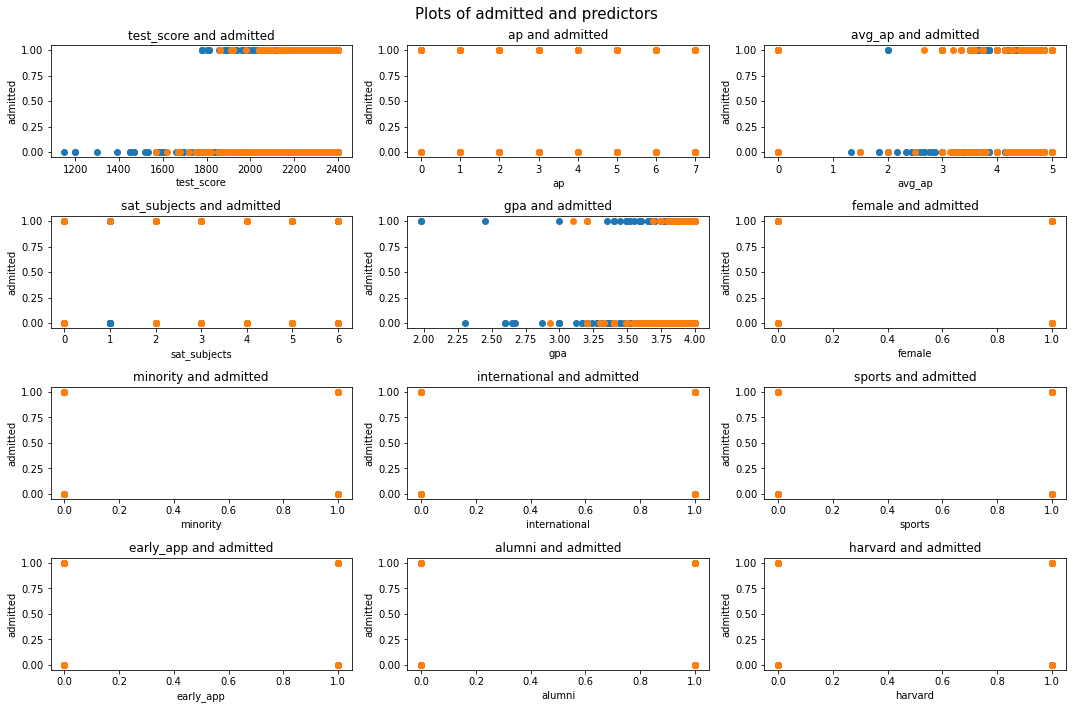

In [12]:
fig,ax=plt.subplots(ncols=3, nrows=4, figsize=(15,10))
ax=ax.ravel()

for i in range(12):
    ax[i].scatter(X_train[cols[i]], y_train)
    ax[i].scatter(X_test[cols[i]], y_test)
    ax[i].set_xlabel(cols[i],fontsize=10)
    ax[i].set_ylabel('admitted',fontsize=10)
    ax[i].set_title(cols[i]+' and admitted',fontsize=12)
    
# fig.delaxes(ax[])

fig.suptitle('Plots of admitted and predictors', fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
    
</div>

_Points:_ 1.5

on a first glance, test scroe, average ap, GPA, but the oter 1 0 features kind of overlap, so it's hard to tell for these (early app, sport, alumni etc...)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>
    
**Q1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  
- Store the coefficient and intercept in `logit1_4_coef` and `logit1_4_intercept`. Interpret these values.
- What are the estimated probabilities of getting into each school? Store these in `p_harvard` and `p_yale`. Which school is easier to get into according to this model?

**IMPORTANT:** Remember, all models in this assignment should be **unregularized** unless you are specifically asked to use regularization for a particular model.
</div>

_Points:_ 2

Based on the model, harvard is easier to get into because the probabilities of acceptance is higher than yale. 

In [14]:
X_train_harvard=pd.DataFrame(X_train['harvard'])
# X_Harvard = X_train_harvard['harvard'].iloc[0]
X_Harvard=X_train_harvard.loc[(X_train_harvard!=0).any(axis=1)]
X_Yale=X_train_harvard.loc[(X_train_harvard!=1).any(axis=1)]


In [15]:
len(X_train_harvard)

1496

In [16]:
# your code here
# Fit logistic regression model without regularization
logit1_4 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5)
logit1_4.fit(X_train_harvard,y_train)

# Identify and report coefficients
logit1_4_coef = float(logit1_4.coef_)
logit1_4_intercept = float(logit1_4.intercept_)

# Calculate and report probabilities
p_harvard = float(np.mean(logit1_4.predict_proba(X_Harvard)[:,1]))
p_yale = float(np.mean(logit1_4.predict_proba(X_Yale)[:,1]))

In [17]:
logit1_4_coef=0.15318829
logit1_4_intercept=-1.11365011
# p_yale
# p_harvard,p_yale

In [18]:
print(
    "The coefficient for the 'logit1_4' model's only predictor 'harvard' "
    "is {:.4f} and the intercept is {:.4f}\n".format(
        logit1_4_coef, logit1_4_intercept
    )
)

print(
    "Estimated probability of acceptance for Harvard: {:.4f}"
    .format(p_harvard)
)
print(
    "Estimated probability of acceptance for Yale: {:.4f}"
    .format(p_yale)
)

The coefficient for the 'logit1_4' model's only predictor 'harvard' is 0.1532 and the intercept is -1.1137

Estimated probability of acceptance for Harvard: 0.2768
Estimated probability of acceptance for Yale: 0.2472


In [19]:
grader.check("q1.4")

q1.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.5** Create and display a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope). Show this calculation using $\LaTeX$ in a markdown cell.
    
**Hint:** The Pandas [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) method may be helpful here.

</div>

_Points:_ 3

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = -1.1137 +  0.1532 X_1$$

$$ X_1 = {1,0} $$

In [21]:
# your code here
pd.crosstab(y_train,X_train['harvard'])

harvard,0,1
admitted,,
0,536,567
1,176,217


In [266]:
yale = 176/(175+536)
harvard = 217/(217+567)

harvard_log_odds = np.log(harvard/(1-harvard))
yale_log_odds = np.log(yale/(1-yale))

In [268]:
# slope and intercept
slope = harvard_log_odds - yale_log_odds
intercept = yale_log_odds
slope, intercept

(0.15132080167056228, -1.1117827518578547)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?
    
</div>

_Points:_ 2

the comparison table aligns with the result we get from the logistic regression probability,the result of our calculation is 5 times higher than the overall acceptance rate, because, the data is collected from volunteer response, meaning, people who are admitted are more likely to share their response.

<!-- END QUESTION -->

---

<a id="part2"></a>

## <div class='exercise'>Question 2: Interpretable modeling [18 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q2.1** 
    
- Fit a logistic regression model to predict `admitted` from `test_score` alone. Call it `logit2_1`.
- Store the learned parameters in `logit2_1_beta0` and `logit2_1_beta1`. 
- Store the train and test classification accuracies for this model in `acc_train_logit2_1` and `acc_test_logit2_1`.
    
</div>

_Points:_ 3

In [25]:
# your code here
df_score_train=pd.DataFrame(X_train['test_score'])
df_score_test=pd.DataFrame(X_test['test_score'])

logit2_1 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5)
logit2_1.fit(df_score_train,y_train)

logit2_1_intercept = float(logit2_1.intercept_)
logit2_1_coef_test = float(logit2_1.coef_)

acc_train_logit2_1 = logit2_1.score(df_score_train,y_train)
acc_test_logit2_1 = logit2_1.score(df_score_test,y_test)

In [26]:
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_1_coef_test))

print(
    "\nThe classification accuracies for 'logit2_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        acc_train_logit2_1, acc_test_logit2_1
    )
)
# END SOLUTION

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test                0.0038

The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013


In [27]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise-r'>

**Q2.2**
    
- What is the estimated probability of an applicant being admitted with an *average* `test` score of 2250? Store this in `prop_test_2250`.
- What about if they had a perfect test score of 2400? Store this in `prop_test_2400`.
- What test score would be needed to have a 50-50 chance (i.e. 0.5 probability) of being admitted? Store this in `test_50_50`.
    
</div>

_Points:_ 4

The probability of an applicant being admitted with an average test score of 2250 is 0.2929.
The probability of an applicant being admitted with an average test score of 2400 is 0.4226. 
The test score would be needed to have a 50-50 chance is 2482.34.

In [28]:
d = {'test_score': [2400]}
d_2={'test_score': [2250]}
df_2400 = pd.DataFrame(data=d)
df_2250 = pd.DataFrame(data=d_2)

In [29]:
-logit2_1_intercept/logit2_1_coef_test

2482.344556268209

In [30]:
df_2400

,test_score
0,2400


In [31]:
# your code here
prob_test_2250 = logit2_1.predict_proba(df_2250).flatten()[1]
prob_test_2400 = logit2_1.predict_proba(df_2400).flatten()[1]
prob_test_2250
test_50_50 = float(-logit2_1_intercept/logit2_1_coef_test)


In [32]:
test_50_50,prob_test_2250

(2482.344556268209, 0.2929492611153432)

In [33]:
# your code here
print(
    "The estimated chances of an applicant being admitted with "
    "the following two 'test' scores:\n\n\tscore\tprobabilities"
    "\n\t2250\t{:.4f}\n\t2400\t{:.4f}\n"
    .format(prob_test_2250, prob_test_2400)
)

print(
    "The test score required to have a 50-50 chance of being "
    "admitted is approximately:\n\n\t{:.2f}"
    .format(test_50_50)
)
# END SOLUTION

The estimated chances of an applicant being admitted with the following two 'test' scores:

	score	probabilities
	2250	0.2929
	2400	0.4226

The test score required to have a 50-50 chance of being admitted is approximately:

	2482.34


In [34]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<div class='exercise-r'>

**Q2.3** Fit a logistic regression model to predict `admitted` from `test_score` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates along with the classification accuracies for this model (on both train and test data).
    
</div>

_Points:_ 3

In [35]:
# your code here
df_score_avg_ap_train=pd.DataFrame(X_train[['test_score','avg_ap']])
df_score_avg_ap_test=pd.DataFrame(X_test[['test_score','avg_ap']])

logit2_3 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5).fit(df_score_avg_ap_train,y_train)

logit2_3_coef_test = logit2_3.coef_.flatten()[0]
logit2_3_coef_avg_ap = logit2_3.coef_.flatten()[1]
logit2_3_intercept = float(logit2_3.intercept_)

acc_train_logit2_3 = logit2_3.score(df_score_avg_ap_train,y_train)
acc_test_logit2_3 = logit2_3.score(df_score_avg_ap_test,y_test)

In [36]:
logit2_3_coef_test

-0.0005365696028901984

In [37]:
# Print the parameters of logit2_3
print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)

The intercept and coefficients for the 'logit2_3' model are:
	intercept           -0.0188
	test                -0.0005
	avg_ap              0.0533

The classification accuracies for 'logit2_3' are:

	Train	0.7373
	TEST	0.7013


In [38]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.4** Interpret the coefficient estimates for both predictors in `logit2_3` and compare the coefficient estimate for `test_score` to the one from `logit2_1`.  Why has this estimate changed?

You should inspect the relationship between `test_score` and `avg_ap` to help get a better sense for what might be happening here.

</div>

_Points:_ 4

In [39]:
# Print the parameters of the last 2 models
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_1_coef_test))

print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test_score          0.0038
The intercept and coefficients for the 'logit2_3' model are:
	intercept           -0.0188
	test_score          -0.0005
	avg_ap              0.0533


coef of average ap is almost 100 times of the coef of test_score, and coef of test_score of log_2-3 is much lower than either the coef of avrage_ap and the coef of test-score in log2-3, indicating that av-ap is more relavant to the admitted rate

In [40]:
# your code here
logit2_3_coef_avg_ap/logit2_3_coef_test

-99.39334467236039

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.5** Interpret and compare the classification accuracies for the two models, `logit2_1` and `logit2_3`.  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar or different.

</div>

_Points:_ 4

In [41]:
# Display accuracies of last 2 models
print(
    "\nThe classification accuracies for 'logit2_1' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_1, acc_test_logit2_1)
)
print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)


The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013

The classification accuracies for 'logit2_3' are:

	Train	0.7373
	TEST	0.7013


They are the same, which indicate the avg_ap and test_score are dependent.

<!-- END QUESTION -->

---

<a id="part3"></a>

## <div class='exercise'>Question 3: Harvard and Yale? [30 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.1**
- Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]`.
- Store the train and test accuracies in `acc_train_logit3_1` and `acc_test_logit3_1`.
- Use the code provided to output the coefficient estimates. Interpret the coefficients for the binary predictors in this model.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 4

In [42]:
# Print statements below assume predictors used in this order
logit3_1_predictors = ["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]

In [43]:
# your code here
logit3_1_df_train=pd.DataFrame(X_train[logit3_1_predictors])
logit3_1_df_test=pd.DataFrame(X_test[logit3_1_predictors])


logit3_1 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5).fit(logit3_1_df_train,y_train)
acc_train_logit3_1 = logit3_1.score(logit3_1_df_train,y_train)
acc_test_logit3_1 = logit3_1.score(logit3_1_df_test,y_test)

In [44]:
# Grab model's intercept and coefs regardless of their shape
# (which depends on how x and y were shaped)
logit3_1_intercept = np.array(logit3_1.intercept_).flatten()[0]
logit3_1_coefs = logit3_1.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_1' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_1_intercept
    )
)
for predictor, coef in zip(logit3_1_predictors, logit3_1_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit3_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit3_1, acc_test_logit3_1)
)

The intercept and coefficients for the 'logit3_1' model are:

	intercept           -12.7022
	harvard             0.1725
	test_score          0.0045
	ap                  -0.0502
	avg_ap              0.0107
	gpa                 0.4015
	female              0.0391
	minority            0.8751

The classification accuracies for 'logit3_1' are:

	Train	0.7393
	TEST	0.6987


In [45]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `["harvard", "test_score", "ap"]` along with the 2 interaction terms: `harvard` with `test_score` and `harvard` with `ap`. Name the columns for these interaction terms `harvard_test_score` and `harvard_ap`.

</div>

_Points:_ 3

In [46]:
# Print statement below assumes this order of predictors
logit3_2_predictors = ["harvard", "test_score", "ap", "harvard_test_score", "harvard_ap"]

In [47]:
for df in [X_train, X_test]:
    df['harvard_test_score'] = df[logit3_2_predictors[0]] * df[logit3_2_predictors[1]]
    df['harvard_ap'] = df[logit3_2_predictors[0]] * df[logit3_2_predictors[2]]
    
    

/var/folders/5g/zghz6vpx7tjc4tcqcfzgy4hw0000gn/T/ipykernel_10439/4008118664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harvard_test_score'] = df[logit3_2_predictors[0]] * df[logit3_2_predictors[1]]
/var/folders/5g/zghz6vpx7tjc4tcqcfzgy4hw0000gn/T/ipykernel_10439/4008118664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harvard_ap'] = df[logit3_2_predictors[0]] * df[logit3_2_predictors[2]]
/var/folders/5g/zghz6vpx7tjc4tcqcfzgy4hw0000gn/T/ipykernel_10439/4008118664.py:2: SettingWithCopyW

In [48]:
X_3_2_train=pd.DataFrame(X_train[logit3_2_predictors])
X_3_2_test=pd.DataFrame(X_test[logit3_2_predictors])

In [49]:
# your code here
logit3_2 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5).fit(X_3_2_train,y_train)

In [50]:
# Display results
logit3_2_intercept = np.array(logit3_2.intercept_).flatten()[0]
logit3_2_coefs = logit3_2.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_2' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_2_intercept
    )
)

for predictor, coef in zip(logit3_2_predictors, logit3_2_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

The intercept and coefficients for the 'logit3_2' model are:

	intercept           -7.1344
	harvard             -4.4410
	test_score          0.0027
	ap                  0.0240
	harvard_test_score  0.0022
	harvard_ap          -0.1101


In [51]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.3** Simplify and write out mathematically the above model from Question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test_score` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
    
**NOTE:** All of your mathematical statements should be written out in your markdown cells using $\LaTeX$. Show all your steps, not just the final result.

</div>

_Points:_ 4

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = -7.1344 +  0.0027 X_2 + 0.0240 X_3$$

$$ X_1 = 0 $$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test_score` as a function of `ap` would an applicant be predicted to have a better than 50% chance (i.e. 0.5 probability) of being admitted into the college they applied to? 

Use the function for Harvard to answer the following question: if a student scored a perfect 2400 on `test_score`, what is the range of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

Again, you should show your work in $\LaTeX$.
</div>

_Points:_ 5

$$\ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right)= -7.1344 + -4.4410 X_1 +  0.0027 X_2 + 0.0240 X_3 + 0.0022*X_1*X_2 -0.1101X_1*X_3 = 0$$

$$ -7.1344 + -4.4410 +  0.0027*2400 + 0.0240 X_3 + 0.0022*2400 -0.1101*X_3 > 0 $$



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test_score` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (including both the location of the boundaries and where the points lie around these boundaries).

**NOTE:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret. It will likely take some careful work here to generate plots with data points that are clear and easy to see. You might try 'dithering' the points with a random offset so they are not all on top of one another.
    
</div>

_Points:_ 5

_Type your answer here, replacing this text._

In [285]:
college_train[:5]

,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info,harvard,harvard_female,harvard_minority
584,JTEQOV7ZCB,0,2080,5,4.400,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...,1,1,0
1817,I03PV24OHY,1,2190,6,3.667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marching concert jazz and orchestral ensembles 30 hrs wee...,0,0,0
1308,K42SAOUYJJ,0,2140,2,4.500,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch Summer Film WorkshopNational Honors Society World ...,0,0,0
1336,LODYYSRTYZ,0,2120,6,3.333,3,4.00,1,0,0,0,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Violin Player Girl Scouts 10 year Member sold over 65...,0,0,0
3,OC717EAKXN,1,2400,5,5.000,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN,1,1,0


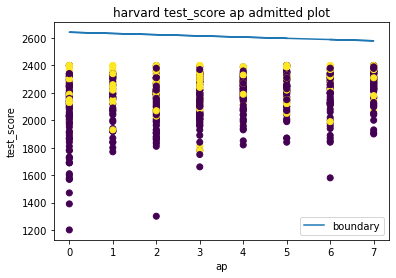

In [296]:
# your code here

fig = plt.figure()
ax1 = fig.add_subplot(111)

X_Harvard=college_train.loc[(college_train['harvard']!=0)]
X_Yale=college_train.loc[(college_train['harvard']==0)]

ax1.plot(X_Harvard['ap'],((7.1344)-0.024*(X_Harvard['ap']))/0.0027,label='boundary')
ax1.scatter(X_Harvard['ap'],X_Harvard['test_score'], c=X_Harvard['admitted'])


plt.title('harvard test_score ap admitted plot')
plt.xlabel('ap')
plt.ylabel('test_score')
plt.legend()
plt.show()

In [290]:
X_Harvard[:5]

,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info,harvard,harvard_female,harvard_minority
584,JTEQOV7ZCB,0,2080,5,4.4,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...,1,1,0
3,OC717EAKXN,1,2400,5,5.0,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN,1,1,0
383,WRCXHZDBPL,0,2220,5,4.4,5,4.00,0,0,0,0,Harvard,0,0,Microbiology,NaN,1,0,0
1601,PIL0J3QIXK,1,2250,5,4.2,3,3.97,0,0,0,0,Harvard,0,0,NaN,Science Olympiad 2008 2011 Captain 10 11 5hrs week Science Bowl 2009 2011 Captain 10 11 4hrs wee...,1,0,0
504,UECNH7XLU8,0,2150,2,5.0,4,3.90,0,1,0,0,Harvard,0,0,chemistry,Student Government Class President 04 05 present Director of Clubs 06 Wolf Pack Sierra High chee...,1,0,1


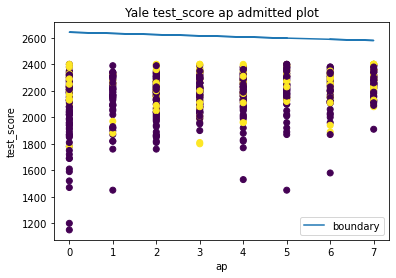

In [298]:
# your code here

plt.plot(X_Harvard['ap'],((7.1344)-0.024*(X_Harvard['ap']))/0.0027,label='boundary')

plt.scatter(X_Yale['ap'],X_Yale['test_score'], c=X_Yale['admitted'])
plt.title('Yale test_score ap admitted plot')
plt.xlabel('ap')
plt.ylabel('test_score')
plt.legend()

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `["harvard", "test_score", "female", "minority"]` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`. 
    
</div>

_Points:_ 3

In [56]:
# Provided code assumes this order of predictors
logit3_6_predictors = ["harvard",
                       "test_score",
                       "female",
                       "minority",
                       "harvard_female",
                       "harvard_minority"
                      ]

In [57]:
for df in [college_train, college_test]:
    df['harvard_female']= df['harvard']*df['female']
    df['harvard_minority']= df['harvard']*df['minority']

In [58]:
college_train

,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info,harvard,harvard_female,harvard_minority
584,JTEQOV7ZCB,0,2080,5,4.400,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...,1,1,0
1817,I03PV24OHY,1,2190,6,3.667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marching concert jazz and orchestral ensembles 30 hrs wee...,0,0,0
1308,K42SAOUYJJ,0,2140,2,4.500,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch Summer Film WorkshopNational Honors Society World ...,0,0,0
1336,LODYYSRTYZ,0,2120,6,3.333,3,4.00,1,0,0,0,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Violin Player Girl Scouts 10 year Member sold over 65...,0,0,0
3,OC717EAKXN,1,2400,5,5.000,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,MYXULLI7EY,0,2230,2,4.500,3,4.00,1,0,0,0,Yale,0,0,biology,NaN,0,0,0
368,APPUQ0I9PS,0,2230,5,4.800,2,4.00,0,0,0,0,Harvard,1,0,NaN,4 Years of Cross Country Captain Senior Year 12 hours week 26 weeks year 4 Years of Track Field ...,1,0,0
648,0W06QI39UD,0,2020,0,0.000,3,4.00,1,0,1,0,Harvard,0,1,Biology,NaN,1,1,0
121,AP2RM4GZQF,0,2340,0,0.000,2,4.00,0,0,0,0,Harvard,0,0,NaN,NaN,1,0,0


In [59]:
# your code here

logit3_6 = LogisticRegression(penalty='none', max_iter = 1000, random_state=5).fit(college_train[logit3_6_predictors],college_train['admitted'])

In [60]:
grader.check("q3.6")

q3.6 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
    
</div>

_Points:_ 4

In [61]:
# Display results
logit3_6_intercept = np.array(logit3_6.intercept_).flatten()[0]
logit3_6_coefs = logit3_6.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_6' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_6_intercept
    )
)

for predictor, coef in zip(logit3_6_predictors, logit3_6_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

The intercept and coefficients for the 'logit3_6' model are:

	intercept           -10.5028
	harvard             0.3844
	test_score          0.0041
	female              0.0214
	minority            1.4139
	harvard_female      0.0493
	harvard_minority    -1.0068


female.coef is negative indicating there might be some gender discrimination for female applicant;
minority is possitive indicating that minority applicants are given slight edge in terms of admitted rate

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting women and minorities?  Why would it be wrong to take this interpretation as truth?

</div>

_Points:_ 2

harvard-female coef is larger than 0, which means from the collect data, female apply to harvard has a better change of getting admitted, It is not truth, because, the data is collected voluntarily, the data is with bias

<!-- END QUESTION -->

---

<a id="part4"></a>

## <div class='exercise'>Question 4: Building predictive models for admitted [24 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test_score` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regularized regression and/or distance-based algorithms such as $k$-NN classification. **(1)** Please explain why scaling under these circumstances might be important. Then, **(2)** actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors. **For the sake of consistency, fit your scaler on just the training data. Then use it to transform both train and test.**

**IMPORTANT:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set. Tests from this point on assume that `X_train` and `X_test` have been standardized with the approach outlined above. 

</div>

_Points:_ 4

Scaling under the circumstances is important because:

Scaling the target value is a good idea in regression modelling; scaling of the data makes it easy for a model to learn and understand the problem.

Standardization maintains outliers.In applications where outliers are useful, standardization should be done.
Standardization is useful when you assume your data comes from a Gaussian distribution (or something that is approximately Gaussian).

In [107]:
# college_train.columns

In [108]:
# college_train.head()

In [204]:
# college_train.columns.to_list()
non_binary_predictors=['test_score','ap', 'avg_ap', 'sat_subjects','gpa']

In [205]:
X_train=college_train[cols]
y_train = college_train['admitted']
X_test=college_test[cols]
y_test = college_test['admitted']

In [206]:
# your code here
# Be certain to ONLY EVER fit your scaler on X train (NEVER fit it on test)
scaler = StandardScaler().fit((X_train[non_binary_predictors]))

# Use your train-fitted scaler to transform both X train and X test
X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])

/var/folders/5g/zghz6vpx7tjc4tcqcfzgy4hw0000gn/T/ipykernel_10439/980649998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
/var/folders/5g/zghz6vpx7tjc4tcqcfzgy4hw0000gn/T/ipykernel_10439/980649998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


In [207]:
# preview summary stats after standardizing
X_train.describe()

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,early_app,alumni,harvard
count,1.496e+03,1.496e+03,1.496e+03,1.496e+03,1.496e+03,1496.0,1496.000,1496.000,1496.000,1496.000,1496.000,1496.000
mean,1.296e-15,-7.332e-17,3.112e-16,5.418e-17,1.863e-16,0.5,0.207,0.060,0.035,0.177,0.049,0.524
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,0.5,0.405,0.238,0.183,0.382,0.217,0.500
min,-6.089e+00,-1.473e+00,-2.191e+00,-2.221e+00,-9.529e+00,0.0,0.000,0.000,0.000,0.000,0.000,0.000
25%,-4.440e-01,-6.158e-01,-7.730e-02,-6.703e-01,-2.432e-01,0.0,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.029e-01,-1.871e-01,4.144e-01,1.052e-01,4.093e-01,0.5,0.000,0.000,0.000,0.000,0.000,1.000
75%,7.322e-01,6.703e-01,7.506e-01,1.052e-01,6.101e-01,1.0,0.000,0.000,0.000,0.000,0.000,1.000
max,1.261e+00,1.528e+00,7.506e-01,2.432e+00,6.101e-01,1.0,1.000,1.000,1.000,1.000,1.000,1.000


In [208]:
X_train_scaled = X_train
X_test_scaled = X_test

In [209]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]` and 10-fold cross-validation with classification accuracy as the scoring metric. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, store your chosen $k$ in `best_k` and the classification accuracy on train and test for your final fitted model as `knn_train_acc` and `knn_test_acc`.
    
</div>

_Points:_ 4

In [210]:
X_4_2_train = X_train
X_4_2_test = X_test_scaled

In [211]:
#X_test

In [212]:
np.random.seed(121) # Do not delete or modify this line of code

ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]

model_ks = []
train_mses=[]
val_stds=[]
val_mses=[]
train_stds=[]


for k in ks:
    model_ks = KNeighborsClassifier(n_neighbors=k).fit(X_4_2_train, y_train)
    
    cv = cross_validate(model_ks,
                        X_4_2_train,
                        y_train,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
    
    train_mses.append(cv['train_score'].mean()*-1)
    train_stds.append(cv['train_score'].std())
    val_mses.append(cv['test_score'].mean()*-1)
    val_stds.append(cv['test_score'].std())

In [213]:
best_k = ks[np.argmin(val_mses)+1]
best_k

71

In [214]:
knn_model = KNeighborsClassifier(n_neighbors=best_k).fit(X_4_2_train, y_train)
y_pred_train = knn_model.predict(X_4_2_train)
y_pred_test = knn_model.predict(X_4_2_test)

knn_train_acc = float(accuracy_score(y_train, y_pred_train))
knn_test_acc = float(accuracy_score(y_test, y_pred_test))

In [215]:
knn_train_acc,knn_test_acc

(0.7372994652406417, 0.7013333333333334)

Text(0.5, 1.0, '4.2 knn model')

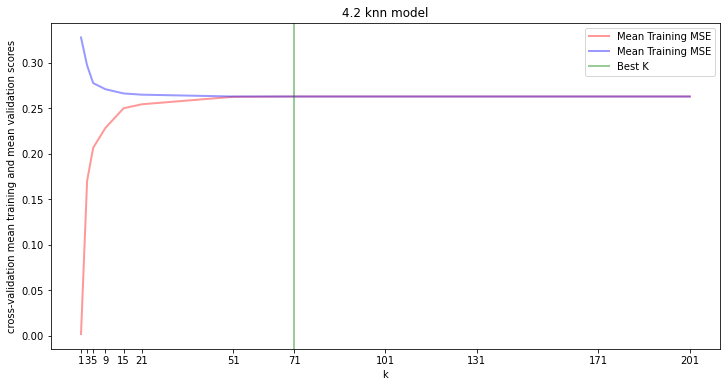

In [216]:
# Plot cross-validation results
# your code here
fig, ax = plt.subplots(1,1, figsize=(12,6))

plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('cross-validation mean training and mean validation scores')


ax.plot(ks, train_mses, label = 'Mean Training MSE', linewidth=2, color='red', alpha=0.4)
ax.plot(ks, val_mses, label = 'Mean Training MSE', linewidth=2, color='blue', alpha=0.4)
ax.axvline(x=best_k, label="Best K", linewidth=2, color="green", alpha=0.4)

plt.legend()
plt.title("4.2 knn model")


In [217]:
print(
    "The classification accuracies for 'knn_model' where k={} "
    "are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        best_k, knn_train_acc, knn_test_acc
    )
)

# create dict for storing test scores for each Q4 model
q4_test_scores = {"knn_model": knn_test_acc}

The classification accuracies for 'knn_model' where k=71 are:

	Train	0.7373
	TEST	0.7013


<!-- END QUESTION -->

<div class='exercise-r'>

**Q4.3** Fit the full logistic regression model (without penalty) with main effects of all 12 predictors in it (call it `logit_full`). Store the classification accuracy on train and test for this model in `logit_full_train_acc` and `logit_full_test_acc`.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 3

In [218]:
# The code that prints your results assumes
# predictors were given to the model in this order
predictor_list = [
    "test_score", "ap", "avg_ap", "sat_subjects",
    "gpa", "female", "minority", "international",
    "sports", "harvard", "early_app", "alumni",
]

In [219]:
# your code here
X_4_3_train = pd.DataFrame(X_train[predictor_list])
X_4_3_test = pd.DataFrame(X_test[predictor_list])

logit_full = LogisticRegression(penalty='none', multi_class = "ovr").fit(X_4_3_train, y_train)

y_pred_train = logit_full.predict(X_4_3_train)
y_pred_test = logit_full.predict(X_4_3_test)

logit_full_train_acc = float(accuracy_score(y_train, y_pred_train))
logit_full_test_acc = float(accuracy_score(y_test, y_pred_test))

In [220]:
# X_4_3_train = pd.DataFrame(X_train[predictor_list])
# X_4_3_test = pd.DataFrame(X_test[predictor_list])

# logit_full = LogisticRegression(penalty='none', max_iter = 1000, random_state=5).fit(X_4_3_train,y_train)
# logit_full_train_acc = logit_full.score(X_4_3_train,y_train)
# logit_full_test_acc = logit_full.score(X_4_3_test,y_test)

# logit_full_train_acc,logit_full_test_acc

In [221]:
# display your results
print(
    "The intercept and coefficients for the 'logit_full' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_full.intercept_).flatten()[0]
    )
)

for predictor, coef in zip(predictor_list, logit_full.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_full' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_full_train_acc, logit_full_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_full"] = logit_full_test_acc

The intercept and coefficients for the 'logit_full' model are:

	intercept           -1.7090
	test_score          0.7838
	ap                  -0.1403
	avg_ap              0.0975
	sat_subjects        -0.0952
	gpa                 0.1056
	female              0.0518
	minority            0.9165
	international       0.4500
	sports              1.2334
	harvard             0.2581
	early_app           0.3737
	alumni              0.6629

The classification accuracies for 'logit_full' are:

	Train	0.7453
	TEST	0.7147


In [222]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<div class='exercise-r'>

**Q4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Store the classification accuracy on train and test for this model in `logit_lasso_train_acc` and `logit_lasso_test_acc`.

</div>

_Points:_ 4

In [223]:
predictor_list = [
    "test_score", "ap", "avg_ap", "sat_subjects",
    "gpa", "female", "minority", "international",
    "sports", "harvard", "early_app", "alumni",
]

In [224]:
X_4_4_train = pd.DataFrame(X_train[predictor_list])
X_4_4_test = pd.DataFrame(X_test[predictor_list])

In [225]:
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
cv = 10
penalty = 'l1'
solver = 'liblinear'

logit_lasso = LogisticRegressionCV(Cs=Cs, cv=cv, penalty=penalty, solver='liblinear').fit(X_4_4_train, y_train)

logit_lasso_train_acc = logit_lasso.score(X_4_4_train, y_train)
logit_lasso_test_acc = logit_lasso.score(X_4_4_test, y_test)


In [226]:
# your code here
# ...
# logit_lasso = ...

# logit_lasso_train_acc = ...
# logit_lasso_test_acc = ...

In [227]:
# Display your results
print(
    "The intercept and coefficients for the 'logit_lasso' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_lasso.intercept_).flatten()[0]
    )
)

# Again, this code assumes predictors were given to the model
# in the order defined in `predictor_list`
for predictor, coef in zip(predictor_list, logit_lasso.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_lasso' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_lasso_train_acc, logit_lasso_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_lasso"] = logit_lasso_test_acc

The intercept and coefficients for the 'logit_lasso' model are:

	intercept           -1.7014
	test_score          0.7819
	ap                  -0.1388
	avg_ap              0.0952
	sat_subjects        -0.0943
	gpa                 0.1045
	female              0.0493
	minority            0.9121
	international       0.4403
	sports              1.2214
	harvard             0.2545
	early_app           0.3702
	alumni              0.6563

The classification accuracies for 'logit_lasso' are:

	Train	0.7453
	TEST	0.7147


In [228]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<div class='exercise-r'>

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? Please remember that, as a general practice, zero-value Lasso coefficients (i.e. $\beta_i=0$) are considered "unimportant". Store your results in `predictors_important` and `predictors_not_important`.
 
</div>

_Points:_ 3

In [229]:
# your code here
...
predictors_important = ['ap','test_score','minority','international','sports','harvard','early_app','alumni','gpa','avg_ap','sat_subjects','female']
predictors_not_important = []

In [230]:
# display results
print(
    "The following predictors were deemed important by "
    "'logit_lasso' (i.e. coef != 0):\n\n\t{}\n\n\n"
    "While, the remaining were deemed unimportant (i.e. "
    "coef == 0):\n\n\t{}"
    .format(
        predictors_important,
        predictors_not_important,
    )
)

The following predictors were deemed important by 'logit_lasso' (i.e. coef != 0):

	['ap', 'test_score', 'minority', 'international', 'sports', 'harvard', 'early_app', 'alumni', 'gpa', 'avg_ap', 'sat_subjects', 'female']


While, the remaining were deemed unimportant (i.e. coef == 0):

	[]


In [231]:
grader.check("q4.5")

q4.5 results: All test cases passed!

<div class='exercise-r'>

**Q4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the unique 2-way interactions between them (call it `lasso_interact`).  Again use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Record the accuracy on train and test for this model in `lasso_interact_train_acc` and `lasso_interact_test_acc`.

</div>

_Points:_ 4

In [232]:
X_4_6_train = X_train_scaled.copy(deep=True)
X_4_6_test = X_test_scaled.copy(deep=True)

In [233]:
# X_4_6_train = pd.DataFrame(X_train_scaled)
# X_4_6_test = pd.DataFrame(X_test_scaled)

In [234]:
# list = [0,1,2,3,4]
# combo = []
# for i in range(len(list)):
#     for j in range(i+1, len(list)):
#         combo.append((i,j))
# combo

In [235]:
interactions = []

for i in range(len(predictors_important)):
    for j in range(i+1, len(predictors_important)):
        X_4_6_train[predictors_important[i],predictors_important[j]]= X_4_6_train[predictors_important[i]]*X_4_6_train[predictors_important[j]]
        X_4_6_test[predictors_important[i],predictors_important[j]]= X_4_6_test[predictors_important[i]]*X_4_6_test[predictors_important[j]]
        interactions.append((predictors_important[i],predictors_important[j]))
        
len(interactions)

66

In [236]:
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
cv = 10
penalty = 'l1'
solver = 'liblinear'

lasso_interact = LogisticRegressionCV(Cs=Cs, cv=cv, penalty=penalty, solver='liblinear').fit(X_4_6_train, y_train)

lasso_interact_train_acc = lasso_interact.score(X_4_6_train, y_train)
lasso_interact_test_acc = lasso_interact.score(X_4_6_test, y_test)
    
    
# View the resulting dataframe
display(X_4_6_train.head())

/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,early_app,alumni,harvard,"(ap, test_score)","(ap, minority)","(ap, international)","(ap, sports)","(ap, harvard)","(ap, early_app)","(ap, alumni)","(ap, gpa)","(ap, avg_ap)","(ap, sat_subjects)","(ap, female)","(test_score, minority)","(test_score, international)",...,"(sports, gpa)","(sports, avg_ap)","(sports, sat_subjects)","(sports, female)","(harvard, early_app)","(harvard, alumni)","(harvard, gpa)","(harvard, avg_ap)","(harvard, sat_subjects)","(harvard, female)","(early_app, alumni)","(early_app, gpa)","(early_app, avg_ap)","(early_app, sat_subjects)","(early_app, female)","(alumni, gpa)","(alumni, avg_ap)","(alumni, sat_subjects)","(alumni, female)","(gpa, avg_ap)","(gpa, sat_subjects)","(gpa, female)","(avg_ap, sat_subjects)","(avg_ap, female)","(sat_subjects, female)"
584,-0.620,0.670,0.398,0.881,0.108,1,0,0,0,1,0,1,-0.416,0.0,0.0,0.0,0.67,0.670,0.0,0.073,0.266,0.590,0.670,-0.0,-0.0,...,0.0,0.0,0.0,0,1,0,0.108,0.398,0.881,1,0,0.108,0.398,0.881,1,0.0,0.0,0.0,0,0.043,0.095,0.108,0.350,0.398,0.881
1817,0.026,1.099,-0.034,0.105,0.460,1,0,0,0,0,0,0,0.029,0.0,0.0,0.0,0.00,0.000,0.0,0.505,-0.037,0.116,1.099,0.0,0.0,...,0.0,-0.0,0.0,0,0,0,0.000,-0.000,0.000,0,0,0.000,-0.000,0.000,0,0.0,-0.0,0.0,0,-0.016,0.048,0.460,-0.004,-0.034,0.105
1308,-0.268,-0.616,0.456,0.105,-0.896,0,0,0,0,0,0,0,0.165,-0.0,-0.0,-0.0,-0.00,-0.000,-0.0,0.552,-0.281,-0.065,-0.000,-0.0,-0.0,...,-0.0,0.0,0.0,0,0,0,-0.000,0.000,0.000,0,0,-0.000,0.000,0.000,0,-0.0,0.0,0.0,0,-0.409,-0.094,-0.000,0.048,0.000,0.000
1336,-0.385,1.099,-0.230,0.105,0.610,1,0,0,0,1,0,0,-0.423,0.0,0.0,0.0,0.00,1.099,0.0,0.670,-0.253,0.116,1.099,-0.0,-0.0,...,0.0,-0.0,0.0,0,0,0,0.000,-0.000,0.000,0,0,0.610,-0.230,0.105,1,0.0,-0.0,0.0,0,-0.140,0.064,0.610,-0.024,-0.230,0.105
3,1.261,0.670,0.751,1.656,0.610,1,0,0,0,0,0,1,0.845,0.0,0.0,0.0,0.67,0.000,0.0,0.409,0.503,1.110,0.670,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0.610,0.751,1.656,1,0,0.000,0.000,0.000,0,0.0,0.0,0.0,0,0.458,1.010,0.610,1.243,0.751,1.656


In [237]:
# your code here
# ...
# lasso_interact = ...
# lasso_interact_train_acc = ...
# lasso_interact_test_acc = ...

In [238]:
coef_list = []
for interaction, coef in zip(interactions, lasso_interact.coef_.flatten()):
    # print(interaction, coef)
    coef_list.append((interaction, coef))
coef_list[:10]

[(('ap', 'test_score'), 0.5699949189398754),
 (('ap', 'minority'), 0.07032731019266099),
 (('ap', 'international'), -0.10427060621787988),
 (('ap', 'sports'), -0.00943260331303377),
 (('ap', 'harvard'), 0.13602580477765097),
 (('ap', 'early_app'), -0.1206559276049681),
 (('ap', 'alumni'), 1.333307585433782),
 (('ap', 'gpa'), 0.0),
 (('ap', 'avg_ap'), 1.4552908392443487),
 (('ap', 'sat_subjects'), 0.38432357091852537)]

In [239]:
print(
    "\nThe classification accuracies for 'logit_lasso_interact' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(lasso_interact_train_acc, lasso_interact_test_acc)
)

# store test score to dict for later use
q4_test_scores["lasso_interact"] = lasso_interact_test_acc


The classification accuracies for 'logit_lasso_interact' are:

	Train	0.7647
	TEST	0.7040



<div class='exercise-r'>

**Q4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? Store these numbers in `num_important_coefs` and `num_unimportant_coefs`. 
    
</div>

_Points:_ 2

In [240]:
coef_lasso=lasso_interact.coef_
cols_inter=X_train.columns
cols_inter
coef_lasso=coef_lasso.flatten()
coef_lasso

array([ 0.56999492,  0.07032731, -0.10427061, -0.0094326 ,  0.1360258 ,
       -0.12065593,  1.33330759,  0.        ,  1.45529084,  0.38432357,
        0.02663142,  0.0781143 , -0.04900488,  0.        , -0.54305725,
       -0.18525811, -0.32429764, -0.190059  ,  0.0534281 ,  0.06552277,
        0.        , -0.06062315,  0.04636023,  0.09686814,  0.17448938,
        0.        ,  0.2354759 , -0.367459  ,  1.0987119 ,  0.12946667,
        0.0049097 , -0.06363251,  0.08050386, -0.13942453, -0.42365587,
       -0.4209989 ,  0.        ,  0.32858026,  0.21979305,  0.24404148,
        0.        , -0.27813825,  0.        ,  0.        , -0.0950587 ,
        0.        ,  0.        ,  0.16492923,  1.1279305 ,  0.16331682,
        0.        ,  0.43823787,  0.        , -0.40004728, -0.10075267,
        0.        , -0.70972492, -0.20065708,  0.53012125,  0.        ,
        0.29882154, -0.24179245,  0.34119878,  0.        , -0.02011284,
        0.20941476,  0.01072347,  0.24724765,  0.        ,  0.15

In [241]:
# your code here
num_unimportant_coefs=0
for i in coef_lasso:
    if i==0:
        num_unimportant_coefs+=1
num_important_coefs = len(coef_lasso)-num_unimportant_coefs
# num_unimportant_coefs = ...

In [242]:
print(
    "Of the {} predictors used in our 'logit_lasso_interact' model:"
    "\n\n\t{} predictors were deemed 'important' by our model"
    "\n\t{} predictors were deemed 'unimportant' with 0-valued "
    "coefficients".format(
        num_important_coefs + num_unimportant_coefs,
        num_important_coefs,
        num_unimportant_coefs
    )
)

Of the 78 predictors used in our 'logit_lasso_interact' model:

	60 predictors were deemed 'important' by our model
	18 predictors were deemed 'unimportant' with 0-valued coefficients


---

<a id="part5"></a>

## <div class='exercise'>Question 5: Evaluating results [12 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.1** Which of the 4 models in Question 4 performs the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in Question 1.1? What does this comparison to the "naive" model tell us?
    
</div>

_Points:_ 2.5

In [243]:
# your code here
print("The TEST accuracies for the 4 models in Q4 are:\n")
for key, value in q4_test_scores.items():
    print("\t{:<25}{:.4f}".format(key, value))
print(
    "\nThe TEST accuracy for our original baseline \"naive\" "
    "model was {:.4f}".format(naive_test_acc)
)

The TEST accuracies for the 4 models in Q4 are:

	knn_model                0.7013
	logit_full               0.7147
	logit_lasso              0.7147
	lasso_interact           0.7040

The TEST accuracy for our original baseline "naive" model was 0.5956


"logit_full" and "logit_lasso" model performs best based on classification accuracy.
"knn_model" model performs worst. 
The models perform better compared to the baseline "naive" model, since the "naive" model's accuracy is 0.6. 
This comparison tells us the model is taking into account of relevant predictors. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in Question 5.1 is better than the worst model identified in 5.1?  How do you know?
    
</div>

_Points:_ 4.5

The ROC curves tells us they perform better. Yes, it supports the best model identified in Question 5.1, because based on the graph with the same true-positive rate, "logit-lasso" and "logit-full" have lower false-positive rate. 

In [244]:
# knn_model_predict = knn_model.predict_proba(X_4_2_test)[:,1]

In [245]:
X_4_2_test[:5]
# X_4_3_test[:5]
# X_4_4_test[:5]
# X_4_6_test[:5]

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,early_app,alumni,harvard
1268,-0.150,1.099,0.358,0.881,0.610,1,0,0,0,1,0,0
1511,-2.737,-0.616,-0.132,0.881,0.108,1,1,0,0,1,0,0
583,-0.562,-0.616,0.162,0.105,0.610,1,0,0,0,0,0,1
1237,-0.032,-1.473,-2.191,-0.670,0.610,0,1,1,0,0,0,0
1542,1.026,0.242,0.751,0.105,-0.394,1,0,0,0,0,0,1


In [246]:
# your code here
knn_model_predict = knn_model.predict_proba(X_4_2_test)[:,1]
logit_full_predict = logit_full.predict_proba(X_4_3_test)[:,1]
logit_lasso_predict = logit_lasso.predict_proba(X_4_4_test)[:,1]
lasso_interact_predict = lasso_interact.predict_proba(X_4_6_test)[:,1]

/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [247]:
# X_4_2_test

In [248]:
knn_model_predict[:20]

array([0.32394366, 0.15492958, 0.18309859, 0.22535211, 0.32394366,
       0.26760563, 0.18309859, 0.28169014, 0.05633803, 0.35211268,
       0.30985915, 0.14084507, 0.23943662, 0.23943662, 0.11267606,
       0.12676056, 0.33802817, 0.16901408, 0.3943662 , 0.32394366])

In [249]:
# your code here

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model_predict)
fpr_full, tpr_full, thresholds_full = roc_curve(y_test, logit_full_predict)
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, logit_lasso_predict)
fpr_interact, tpr_interact, thresholds_interact = roc_curve(y_test, lasso_interact_predict)

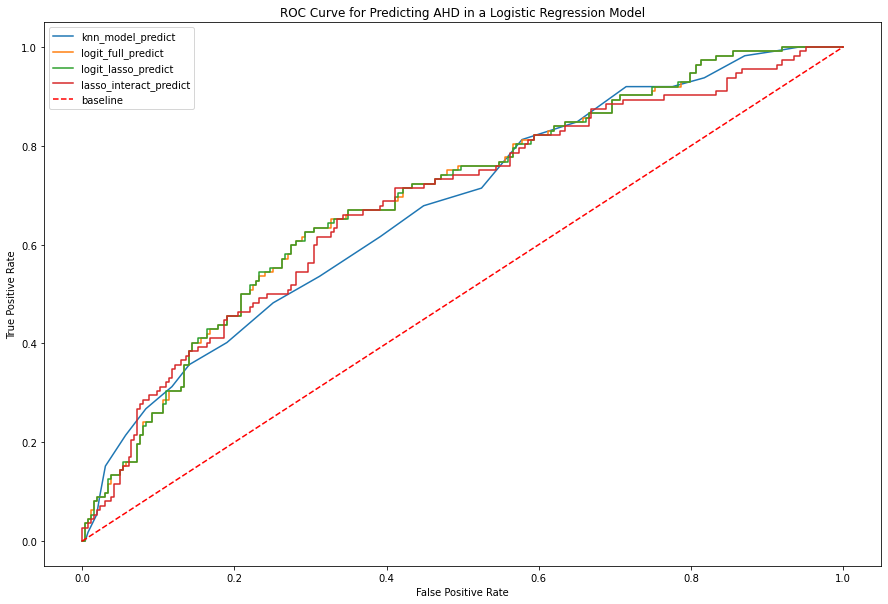

In [299]:
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(fpr_knn,tpr_knn,label="knn_model_predict")
plt.plot(fpr_full,tpr_full,label="logit_full_predict")
plt.plot(fpr_logit,tpr_logit,label="logit_lasso_predict")
plt.plot(fpr_interact,tpr_interact,label="lasso_interact_predict")
plt.plot([0, 1], [0, 1],'r--', label="baseline")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting AHD in a Logistic Regression Model")
plt.legend()
plt.show()

In [251]:
# your code here
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**5.3** Calculate the AUC for all 4 models and store these in `auc_list`. **The order of AUCs in the list should match the order of the model as they appear in `q4_test_scores`.**
    
Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
    
</div>

_Points:_ 3

Yes, the models based on AUC match the classification accuracy. Because the higher the classification accuracy, the higher the AUC scores. 

In [252]:
knn_model_predict_y = knn_model.predict(X_4_2_test)
logit_full_predict_y = logit_full.predict(X_4_3_test)
logit_lasso_predict_y = logit_lasso.predict(X_4_4_test)
lasso_interact_predict_y = lasso_interact.predict(X_4_6_test)

/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [253]:
knn_model_auc_score = roc_auc_score(y_test,knn_model_predict_y)
logit_full_predict_auc_score = roc_auc_score(y_test,logit_full_predict_y)
logit_lasso_predict_auc_score = roc_auc_score(y_test,logit_lasso_predict_y)
lasso_interact_predict_auc_score = roc_auc_score(y_test,lasso_interact_predict_y)

knn_model_auc_score,logit_full_predict_auc_score,logit_lasso_predict_auc_score,lasso_interact_predict_auc_score

(0.5, 0.5479528788701793, 0.5479528788701793, 0.5454746061922868)

In [254]:
# from sklearn import metrics
# knn_model_auc = metrics.auc(fpr_knn, tpr_knn)
# logit_full_predict_auc = metrics.auc(fpr_full, tpr_full)
# logit_lasso_predict_auc = metrics.auc(fpr_logit, tpr_logit)
# lasso_interact_predict_auc = metrics.auc(fpr_interact, tpr_interact)

# knn_model_auc,logit_full_predict_auc,logit_lasso_predict_auc,lasso_interact_predict_auc

In [259]:
# your code here
# calculate each model's AUC using its ROC fpr and tpr
auc_list=[knn_model_auc_score,logit_full_predict_auc_score,logit_lasso_predict_auc_score,lasso_interact_predict_auc_score]
auc_list

[0.5, 0.5479528788701793, 0.5479528788701793, 0.5454746061922868]

In [260]:
print(
    "The TEST accuracies vs. AUC scores for the 4 models in Q4 are:"
    "\n\n\t\t\t\tAccuracy\tAUC"
)
for (key, value), auc_value in zip(q4_test_scores.items(), auc_list):
    print("\t{:<24}{:.4f}\t\t{:.4f}".format(key, value, auc_value))

The TEST accuracies vs. AUC scores for the 4 models in Q4 are:

				Accuracy	AUC
	knn_model               0.7013		0.5000
	logit_full              0.7147		0.5480
	logit_lasso             0.7147		0.5480
	lasso_interact          0.7040		0.5455


In [261]:
grader.check("q5.3")

q5.3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use and why?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?
    
</div>

_Points:_ 2

- By comparing accuracies, we choose to use either "logit_full" or "logit_lasso" model. However, in order to prevent over-fitting, we choose to use "logit_lasso" model. 



- The biggest issue that some student might be intimidated by the predicted probability and not apply, but the model is based on biased data and some other factors like (hobbies, extra curricular activities) are not taken as predictors, this might result in inaccuracy.

<!-- END QUESTION -->

**This concludes HW5. Thank you!**

[Return to contents](#contents)